#### Imports & Setup
Load necessary libraries

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os

# --- CONFIGURATION ---
# 1. Checkerboard Settings (Internal corners)
# For a 10x7 board, internal corners are usually (9, 6)
CHECKERBOARD_DIMS = (9, 6) 

# 2. Output Scale
SCALE_FACTOR = 10.0  # 10 pixels = 1 cm

print("Libraries loaded. Configuration set.")

Libraries loaded. Configuration set.


#### Lens Calibration
Processes checkerboard videos to calculate the Camera Matrix ($K$) and Distortion Coefficients ($D$). This removes the "fish-eye" curvature from the lens.

In [ ]:
# # List your checkerboard video files here
# checkerboard_videos = ['checkerboard/IMG_1059.MOV', 'checkerboard/IMG_1060.MOV', 'checkerboard/IMG_1061.MOV', 'checkerboard/IMG_1062.MOV']

# # Prep arrays
# objp = np.zeros((CHECKERBOARD_DIMS[0] * CHECKERBOARD_DIMS[1], 3), np.float32)
# objp[:, :2] = np.mgrid[0:CHECKERBOARD_DIMS[0], 0:CHECKERBOARD_DIMS[1]].T.reshape(-1, 2)

# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane
# image_size = None

# print("Processing checkerboard videos...")

# for video_path in checkerboard_videos:
#     print("Processing:", video_path)
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print(f"Warning: Could not open {video_path}")
#         continue

#     frame_count = 0
#     while True:
#         ret, frame = cap.read()
#         if not ret: break

#         i = 10 #@param {type:"integer"}
#         # Process every ith frame to avoid duplicates and speed up
#         if frame_count % i == 0:
#             gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#             if image_size is None:
#                 image_size = gray.shape[::-1]

#             # Find the chess board corners
#             ret_corners, corners = cv2.findChessboardCorners(gray, CHECKERBOARD_DIMS, None)

#             if ret_corners:
#                 objpoints.append(objp)
#                 # Refine corner locations
#                 corners2 = cv2.cornerSubPix(
#                     gray, corners, (11, 11), (-1, -1), 
#                     (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#                 )
#                 imgpoints.append(corners2)
        
#         frame_count += 1
#     cap.release()

# if len(objpoints) > 0:
#     # Calibrate
#     ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
#     print(f"\nCalibration Successful!")
#     print(f"RMS Re-projection Error: {ret:.4f} pixels")
#     print(f"Camera Matrix:\n{mtx}")
# else:
#     print("Error: No checkerboard corners were found. Check your board dimensions or video quality.")

Processing checkerboard videos...

Calibration Successful!
RMS Re-projection Error: 1.9076 pixels
Camera Matrix:
[[5.02358058e+03 0.00000000e+00 8.77316686e+02]
 [0.00000000e+00 3.81821698e+03 1.81310913e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
# import glob

# # --- CONFIGURATION ---
# # 1. Path to your checkerboard images (e.g., "calibration_photos/*.jpg")
# # Make sure to upload your images to the notebook environment first!
# image_path_pattern = 'checkerboard/*.jpeg' 

# # 2. Checkerboard Dims (Internal corners)
# # CHECKERBOARD_DIMS = (8, 5) 

# # ---------------------

# # Prep arrays
# objp = np.zeros((CHECKERBOARD_DIMS[0] * CHECKERBOARD_DIMS[1], 3), np.float32)
# objp[:, :2] = np.mgrid[0:CHECKERBOARD_DIMS[0], 0:CHECKERBOARD_DIMS[1]].T.reshape(-1, 2)

# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane
# image_size = None

# # Get list of images
# images = glob.glob(image_path_pattern)

# print(f"Found {len(images)} images. Processing...")

# for fname in images:
#     img = cv2.imread(fname)
#     if img is None:
#         print(f"Warning: Could not read {fname}")
#         continue
        
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Store image size for calibration later
#     if image_size is None:
#         image_size = gray.shape[::-1]

#     # Find the chess board corners
#     ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD_DIMS, None)

#     if ret:
#         objpoints.append(objp)
#         # Refine corner locations for high accuracy
#         corners2 = cv2.cornerSubPix(
#             gray, corners, (11, 11), (-1, -1), 
#             (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
#         )
#         imgpoints.append(corners2)
#         print(f" - Corners found in {fname}")
#     else:
#         print(f" - Corners NOT found in {fname}")

# if len(objpoints) > 0:
#     # Calibrate
#     ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
#     print(f"\nCalibration Successful!")
#     print(f"RMS Re-projection Error: {ret:.4f} pixels")
#     print(f"Distortion Coefficients:\n{dist}")
# else:
#     print("\nError: No valid corners found. Check your 'image_path_pattern' or board dimensions.")

Found 5 images. Processing...
 - Corners found in checkerboard/checker_3.jpeg
 - Corners found in checkerboard/WhatsApp Image 2026-01-28 at 09.21.25.jpeg
 - Corners found in checkerboard/checker_2.jpeg
 - Corners found in checkerboard/checker_1.jpeg
 - Corners found in checkerboard/WhatsApp Image 2026-01-28 at 09.21.26.jpeg

Calibration Successful!
RMS Re-projection Error: 0.5636 pixels
Distortion Coefficients:
[[ 1.50991444e-01 -1.45365692e-01 -1.31844976e-03 -1.01399808e-03
  -1.16962655e+00]]


Found 6 images. Processing...


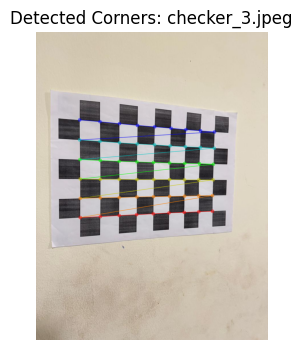

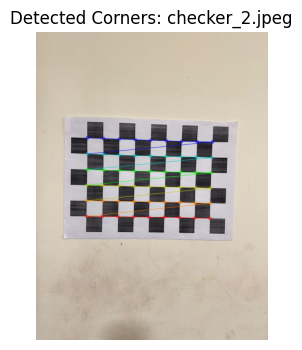

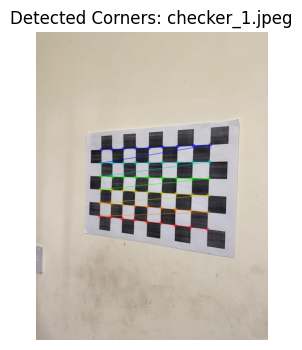

 - Corners NOT found in checkerboard/checker_6.png
 - Corners NOT found in checkerboard/checker_4.png
 - Corners NOT found in checkerboard/checker_5.png

Calibration Complete! RMS Error: 0.5263


In [14]:
import glob

# --- CONFIGURATION ---
image_path_patterns = ('checkerboard/*.jpeg', 'checkerboard/*.png')
CHECKERBOARD_DIMS = (9, 6) 

# Prep arrays
objp = np.zeros((CHECKERBOARD_DIMS[0] * CHECKERBOARD_DIMS[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD_DIMS[0], 0:CHECKERBOARD_DIMS[1]].T.reshape(-1, 2)

objpoints = [] 
imgpoints = [] 
image_size = None

images = glob.glob(image_path_patterns[0]) + glob.glob(image_path_patterns[1])
print(f"Found {len(images)} images. Processing...")

# Counter to limit how many images we display (to keep notebook clean)
display_count = 0 

for fname in images:
    img = cv2.imread(fname)
    if img is None: continue
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if image_size is None:
        image_size = gray.shape[::-1]

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD_DIMS, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1), 
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        )
        imgpoints.append(corners2)
        
        # --- VISUALIZATION BLOCK ---
        # Only show the first 3 images to avoid spamming the notebook
        if display_count < 3:
            # Draw the corners on a copy of the image
            vis_img = img.copy()
            cv2.drawChessboardCorners(vis_img, CHECKERBOARD_DIMS, corners2, ret)
            
            # Convert BGR (OpenCV) to RGB (Matplotlib)
            plt.figure(figsize=(6, 4))
            plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Detected Corners: {os.path.basename(fname)}")
            plt.axis('off')
            plt.show()
            display_count += 1
    else:
        print(f" - Corners NOT found in {fname}")

# Check if we have enough data to calibrate
if len(objpoints) > 0:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    print(f"\nCalibration Complete! RMS Error: {ret:.4f}")
else:
    print("\nError: No valid corners found.")

#### Ground Plane Definition

INSTRUCTIONS: Click the 4 corners of the pothole/rectangle you measured.
Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left


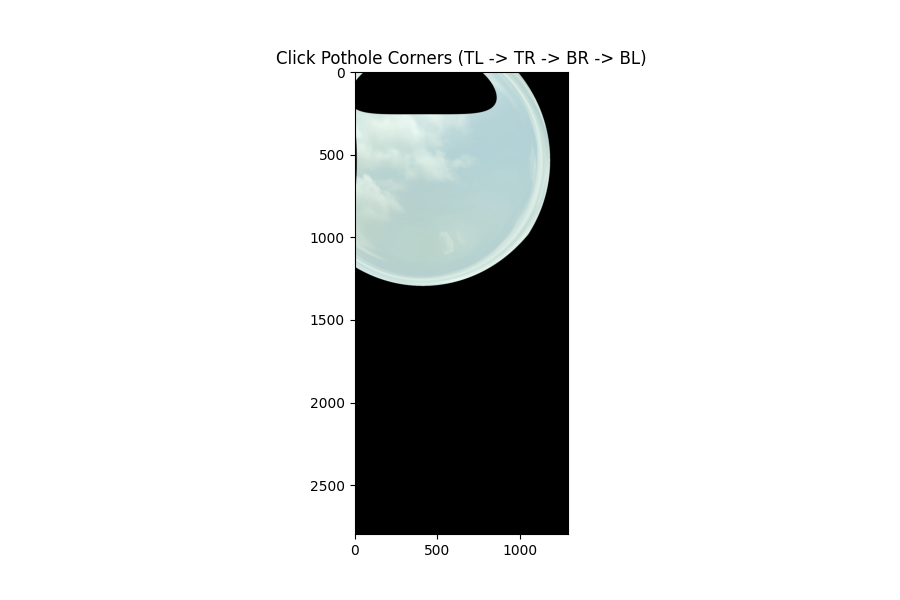

In [17]:
# --- REVISED CELL 3: EXTRACT & CLICK (SCREENSHOT VERSION) ---
%matplotlib widget
import matplotlib.pyplot as plt
import ipywidgets as widgets
import cv2
import numpy as np

# 1. Load the Screenshot
screenshot_path = 'pothole_1.png'  # <--- UPDATE THIS FILENAME
raw_frame = cv2.imread(screenshot_path)

if raw_frame is None:
    raise ValueError(f"Could not find or open the image: {screenshot_path}")

# 2. Undistort the image (Crucial step!)
# We use the 'mtx' and 'dist' you calculated in Cell 2
h, w = raw_frame.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
undistorted_frame = cv2.undistort(raw_frame, mtx, dist, None, newcameramtx)

# 3. Interactive Point Picker
print("INSTRUCTIONS: Click the 4 corners of the pothole/rectangle you measured.")
print("Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left")

fig, ax = plt.subplots(figsize=(9, 6))
# Convert BGR to RGB for correct color display
ax.imshow(cv2.cvtColor(undistorted_frame, cv2.COLOR_BGR2RGB))
ax.set_title("Click Pothole Corners (TL -> TR -> BR -> BL)")

clicked_points = []

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        clicked_points.append([event.xdata, event.ydata])
        # Mark the point with a red dot
        ax.plot(event.xdata, event.ydata, 'ro', markersize=5)
        fig.canvas.draw()
        print(f"Captured Point {len(clicked_points)}: {int(event.xdata)}, {int(event.ydata)}")
        
        if len(clicked_points) == 4:
            print("\nSUCCESS: 4 points captured. Proceed to Cell 4.")
            fig.canvas.mpl_disconnect(cid)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

Road Image Resolution: 1287x2298
Calibration Resolution: (810, 1080)
⚠️ Resolution mismatch detected! Scaling camera matrix...

INSTRUCTIONS: Click the 4 corners of the pothole.


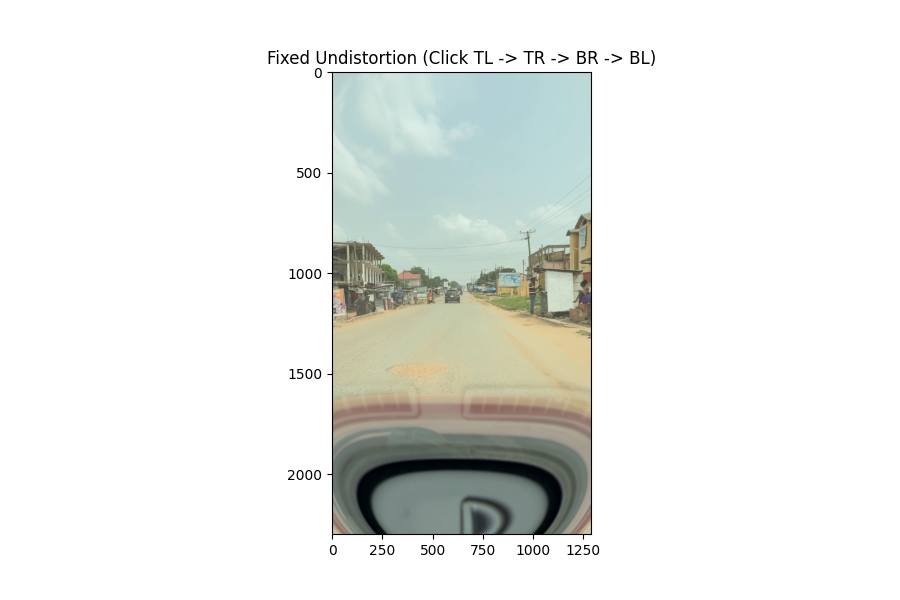

In [19]:
# --- REVISED CELL 3: DIAGNOSTIC & FIX ---
%matplotlib widget
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. Load the Screenshot
screenshot_path = 'pothole_1.png'  # <--- UPDATE THIS
raw_frame = cv2.imread(screenshot_path)

if raw_frame is None:
    raise ValueError(f"Could not open {screenshot_path}")

h, w = raw_frame.shape[:2]
print(f"Road Image Resolution: {w}x{h}")
print(f"Calibration Resolution: {image_size}")

# --- FIX: HANDLE RESOLUTION MISMATCH ---
# If the road image is different from the calibration image, we must scale the matrix
if image_size is not None and (w, h) != image_size:
    print("⚠️ Resolution mismatch detected! Scaling camera matrix...")
    scale_x = w / image_size[0]
    scale_y = h / image_size[1]
    
    # Scale the focal lengths (fx, fy) and optical centers (cx, cy)
    mtx_scaled = mtx.copy()
    mtx_scaled[0, 0] *= scale_x # fx
    mtx_scaled[1, 1] *= scale_y # fy
    mtx_scaled[0, 2] *= scale_x # cx
    mtx_scaled[1, 2] *= scale_y # cy
    
    current_mtx = mtx_scaled
else:
    current_mtx = mtx

# --- FIX: REMOVE BLACK BORDERS ---
# We use alpha=0 to crop the black borders out. 
# We also center the image using the new dimensions.
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(current_mtx, dist, (w, h), 0, (w, h))

# Undistort
undistorted_frame = cv2.undistort(raw_frame, current_mtx, dist, None, newcameramtx)

# Crop the image to the valid ROI (Region of Interest) to remove any remaining black edges
x, y, w_roi, h_roi = roi
if w_roi > 0 and h_roi > 0:
    undistorted_frame = undistorted_frame[y:y+h_roi, x:x+w_roi]

# --- PLOT ---
print("\nINSTRUCTIONS: Click the 4 corners of the pothole.")
fig, ax = plt.subplots(figsize=(9, 6))
ax.imshow(cv2.cvtColor(undistorted_frame, cv2.COLOR_BGR2RGB))
ax.set_title("Fixed Undistortion (Click TL -> TR -> BR -> BL)")

clicked_points = []

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        clicked_points.append([event.xdata, event.ydata])
        ax.plot(event.xdata, event.ydata, 'ro', markersize=5)
        fig.canvas.draw()
        print(f"Point {len(clicked_points)}: {int(event.xdata)}, {int(event.ydata)}")
        
        if len(clicked_points) == 4:
            print("SUCCESS: 4 points captured.")
            fig.canvas.mpl_disconnect(cid)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

INSTRUCTIONS: Click the 4 corners of the pothole you measured.
Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left


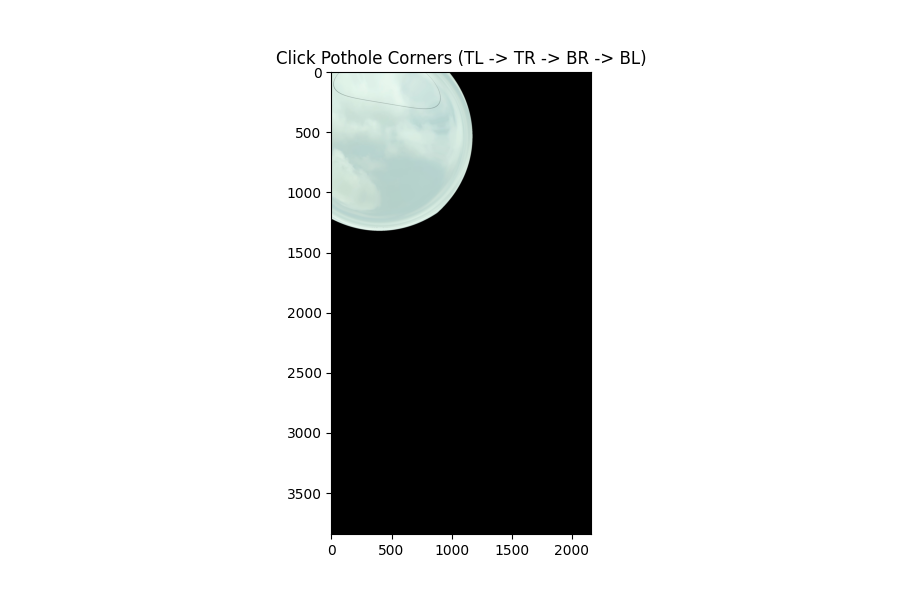

In [ ]:
# # --- CELL 3: EXTRACT & CLICK ---
# %matplotlib widget
# import matplotlib.pyplot as plt
# import ipywidgets as widgets

# # 1. Load the Road Video
# road_video_path = 'IMG_1020.MOV' # Update this filename
# cap = cv2.VideoCapture(road_video_path)

# # Skip 30 frames to let auto-focus/exposure settle
# for i in range(30):
#     ret, raw_frame = cap.read()
# cap.release()

# if not ret:
#     raise ValueError("Could not read frame from road video.")

# # 2. Undistort the frame (Using your valid calibration)
# h, w = raw_frame.shape[:2]
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
# undistorted_frame = cv2.undistort(raw_frame, mtx, dist, None, newcameramtx)

# # 3. Interactive Point Picker
# print("INSTRUCTIONS: Click the 4 corners of the pothole you measured.")
# print("Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left")

# fig, ax = plt.subplots(figsize=(9, 6))
# ax.imshow(cv2.cvtColor(undistorted_frame, cv2.COLOR_BGR2RGB))
# ax.set_title("Click Pothole Corners (TL -> TR -> BR -> BL)")

# clicked_points = []

# def onclick(event):
#     if event.xdata is not None and event.ydata is not None:
#         clicked_points.append([event.xdata, event.ydata])
#         ax.plot(event.xdata, event.ydata, 'ro', markersize=5)
#         fig.canvas.draw()
#         print(f"Captured Point {len(clicked_points)}: {int(event.xdata)}, {int(event.ydata)}")
        
#         if len(clicked_points) == 4:
#             print("\nSUCCESS: 4 points captured. Proceed to Cell 4.")
#             fig.canvas.mpl_disconnect(cid)

# cid = fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()

Displaying undistorted frame...
Please identify the coordinates of the 4 corners of your measured pothole.
Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left


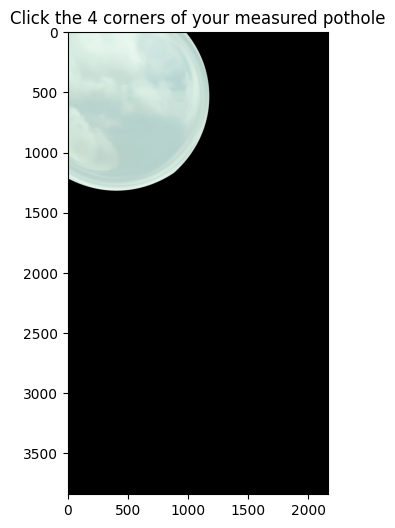

In [ ]:
# # --- STEP 3.1: Get a clear frame ---
# road_video_path = 'IMG_1020.MOV' 
# cap = cv2.VideoCapture(road_video_path)

# # Skip a few frames to get past any initial shake/blur
# for i in range(40):
#     ret, raw_frame = cap.read()
# cap.release()

# if not ret:
#     raise ValueError("Could not read frame from road video.")

# # --- STEP 3.2: Undistort the frame ---
# h, w = raw_frame.shape[:2]
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
# undistorted_frame = cv2.undistort(raw_frame, mtx, dist, None, newcameramtx)

# # --- STEP 3.3: Interactive Click Tool ---
# # Using standard input because notebook interactions can vary
# print("Displaying undistorted frame...")
# print("Please identify the coordinates of the 4 corners of your measured pothole.")
# print("Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left")

# # Start an interactive matplotlib window
# %matplotlib inline
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.imshow(cv2.cvtColor(undistorted_frame, cv2.COLOR_BGR2RGB))
# ax.set_title("Click the 4 corners of your measured pothole")

# clicked_points = []

# def onclick(event):
#     if event.xdata is not None and event.ydata is not None:
#         clicked_points.append([event.xdata, event.ydata])
#         ax.plot(event.xdata, event.ydata, 'ro')
#         fig.canvas.draw()
#         print(f"Point captured: {len(clicked_points)}/4")
        
#         if len(clicked_points) == 4:
#             print("\nCaptured all points!")
#             print(clicked_points)

# cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [5]:
clicked_points = [
    [1450.0, 2250.0], 
    [1600.0, 2250.0], 
    [1450.0, 2350.0], 
    [1600.0, 2350.0]
]

#### Compute Perspective Matrix

In [6]:
# --- CONFIGURATION: REAL WORLD MEASUREMENTS ---
REAL_WIDTH_CM = 50.0   
REAL_HEIGHT_CM = 80.0 

# ----------------------------------------------

if len(clicked_points) != 4:
    raise ValueError("You must click exactly 4 points in Cell 3 before running this!")

src_pts = np.float32(clicked_points)

# Define the destination points based on scale (10px = 1cm)
# We map the source polygon to a perfect rectangle
dst_w = int(REAL_WIDTH_CM * SCALE_FACTOR)
dst_h = int(REAL_HEIGHT_CM * SCALE_FACTOR)

dst_pts = np.float32([
    [0, 0],           # Top-Left
    [dst_w, 0],       # Top-Right
    [dst_w, dst_h],   # Bottom-Right
    [0, dst_h]        # Bottom-Left
])

# Calculate the Homography Matrix (Perspective Transform)
M_perspective = cv2.getPerspectiveTransform(src_pts, dst_pts)

print("Perspective Matrix Calculated.")

Perspective Matrix Calculated.


#### Frame Processing Module

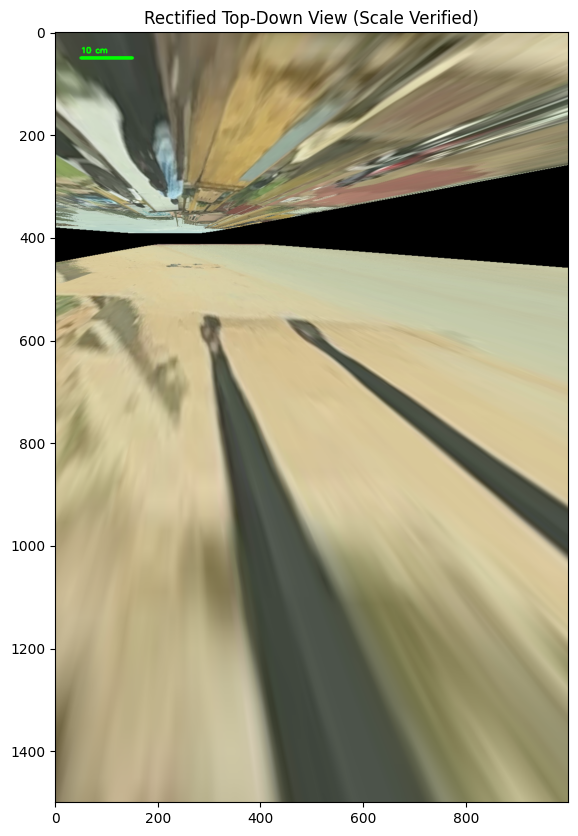

In [8]:
def process_frame(raw_frame):
    """
    Takes a raw frame, undistorts it, and warps it to top-down view.
    Scale: 10 pixels = 1 cm
    """
    # 1. Undistort
    h, w = raw_frame.shape[:2]
    newcameramtx, _ = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    undistorted = cv2.undistort(raw_frame, mtx, dist, None, newcameramtx)
    
    # 2. Warp Perspective
    # Note: You may need to adjust the output size (1000, 2000) depending on how much road you want to see
    # The transform 'M_perspective' is anchored at (0,0) for the top-left of your pothole.
    # To see more road, we might need to translate the matrix, but let's start here.
    top_down = cv2.warpPerspective(undistorted, M_perspective, (1000, 1500))
    
    return top_down

# --- TEST IT ---
rectified_image = process_frame(raw_frame)

# Draw a 10cm scale bar (100 pixels) to verify
cv2.line(rectified_image, (50, 50), (150, 50), (0, 255, 0), 5)
cv2.putText(rectified_image, "10 cm", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.title("Rectified Top-Down View (Scale Verified)")
plt.show()

#### New Cells 3 and 4

INSTRUCTIONS: Click the 4 corners of the pothole on the RAW image.
Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left


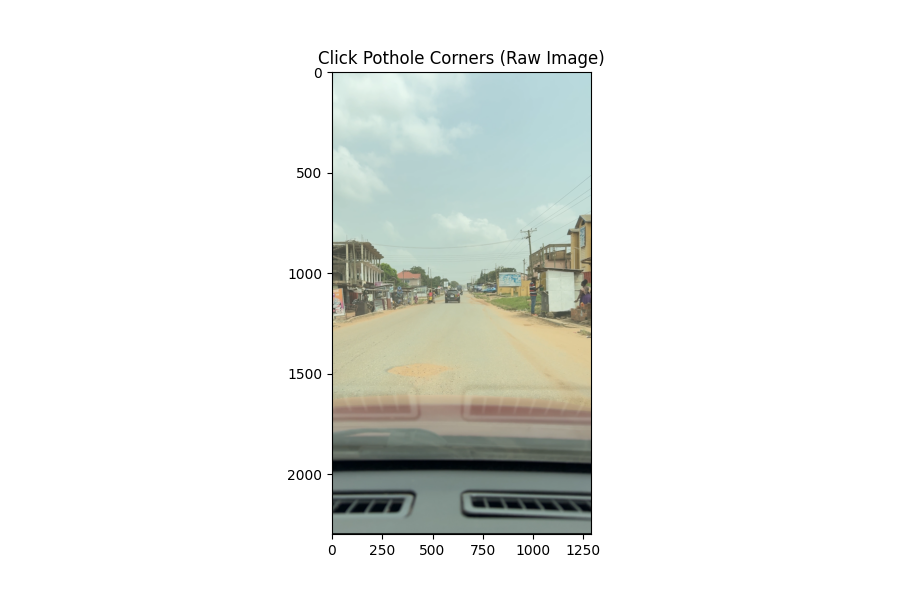

In [20]:
# --- DIRECT PERSPECTIVE SETUP ---
%matplotlib widget
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 1. Load the raw screenshot directly
screenshot_path = 'pothole_1.PNG'  # <--- Update to your original filename
raw_frame = cv2.imread(screenshot_path)

if raw_frame is None:
    raise ValueError(f"Could not open {screenshot_path}")

print("INSTRUCTIONS: Click the 4 corners of the pothole on the RAW image.")
print("Order: Top-Left -> Top-Right -> Bottom-Right -> Bottom-Left")

fig, ax = plt.subplots(figsize=(9, 6))
ax.imshow(cv2.cvtColor(raw_frame, cv2.COLOR_BGR2RGB))
ax.set_title("Click Pothole Corners (Raw Image)")

clicked_points = []

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        clicked_points.append([event.xdata, event.ydata])
        ax.plot(event.xdata, event.ydata, 'ro', markersize=5)
        fig.canvas.draw()
        print(f"Point {len(clicked_points)}: {int(event.xdata)}, {int(event.ydata)}")
        
        if len(clicked_points) == 4:
            print("SUCCESS: 4 points captured.")
            fig.canvas.mpl_disconnect(cid)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

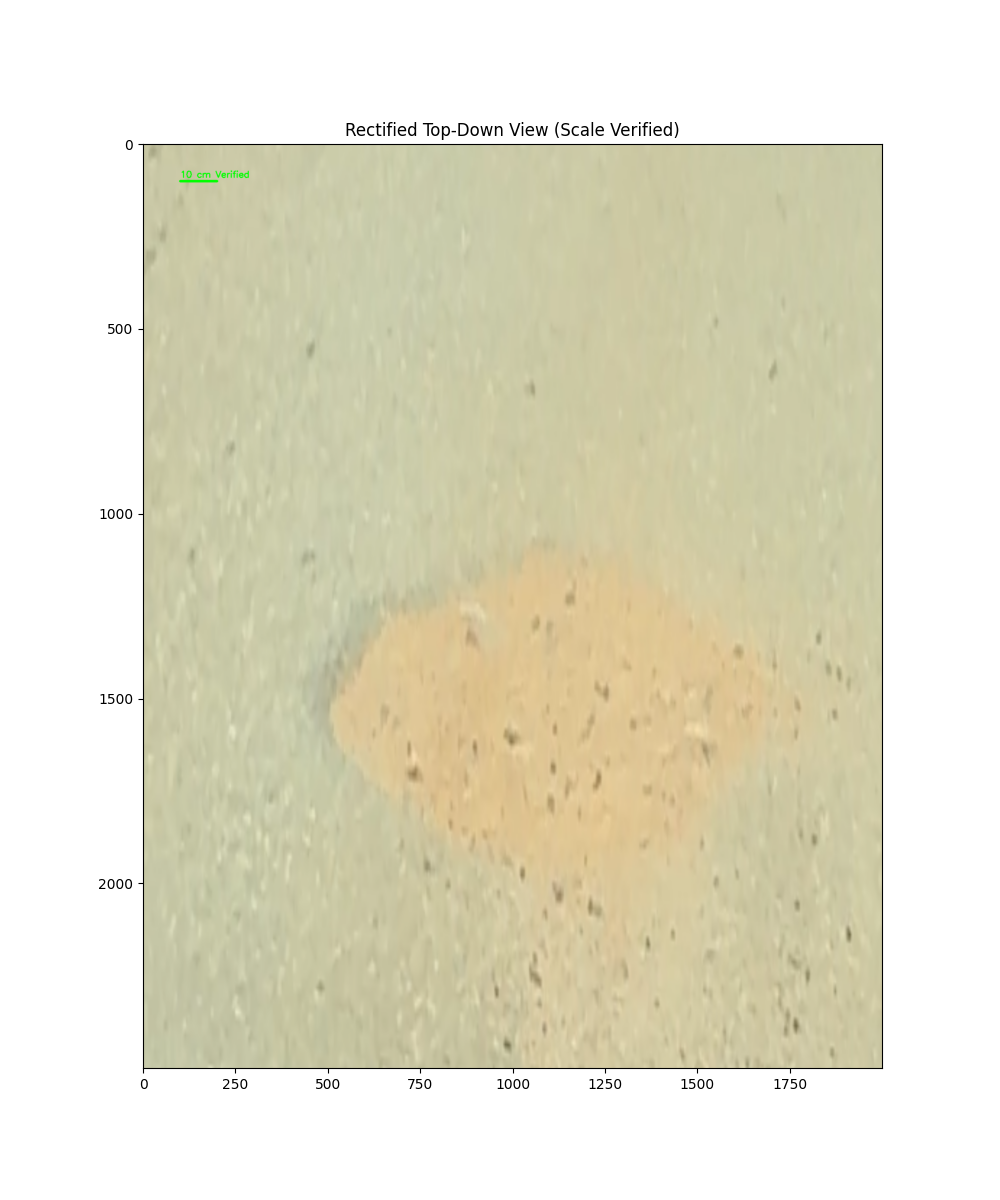

In [21]:
# --- GENERATE DELIVERABLE (DIRECT) ---

# !!! UPDATE MEASUREMENTS (cm) !!!
POTHOLE_WIDTH_CM = 109.0  
POTHOLE_LENGTH_CM = 112.0

# Scale: 10 pixels = 1 cm
SCALE = 10.0 

if len(clicked_points) != 4:
    print("ERROR: Please click 4 points in the cell above.")
else:
    # 1. Define Source and Destination
    src_pts = np.float32(clicked_points)

    dst_w = int(POTHOLE_WIDTH_CM * SCALE)
    dst_h = int(POTHOLE_LENGTH_CM * SCALE)

    dst_pts = np.float32([
        [0, 0],           # Top-Left
        [dst_w, 0],       # Top-Right
        [dst_w, dst_h],   # Bottom-Right
        [0, dst_h]        # Bottom-Left
    ])

    # 2. Calculate Perspective Matrix
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    
    # 3. Shift the view so we see the road, not just the pothole
    # Shift x by 500px (50cm) and y by 1000px (100cm)
    M_shifted = M.copy()
    M_shifted[0, 2] += 500
    M_shifted[1, 2] += 1000

    # 4. Warp
    # Use a large canvas (e.g., 2000x2500) to capture the road ahead
    h, w = raw_frame.shape[:2]
    top_down_view = cv2.warpPerspective(raw_frame, M_shifted, (2000, 2500))

    # 5. Add Verification Line
    cv2.line(top_down_view, (100, 100), (200, 100), (0, 255, 0), 5)
    cv2.putText(top_down_view, "10 cm Verified", (100, 90), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # 6. Display
    plt.figure(figsize=(10, 12))
    plt.imshow(cv2.cvtColor(top_down_view, cv2.COLOR_BGR2RGB))
    plt.title("Rectified Top-Down View (Scale Verified)")
    plt.axis('on')
    plt.show()

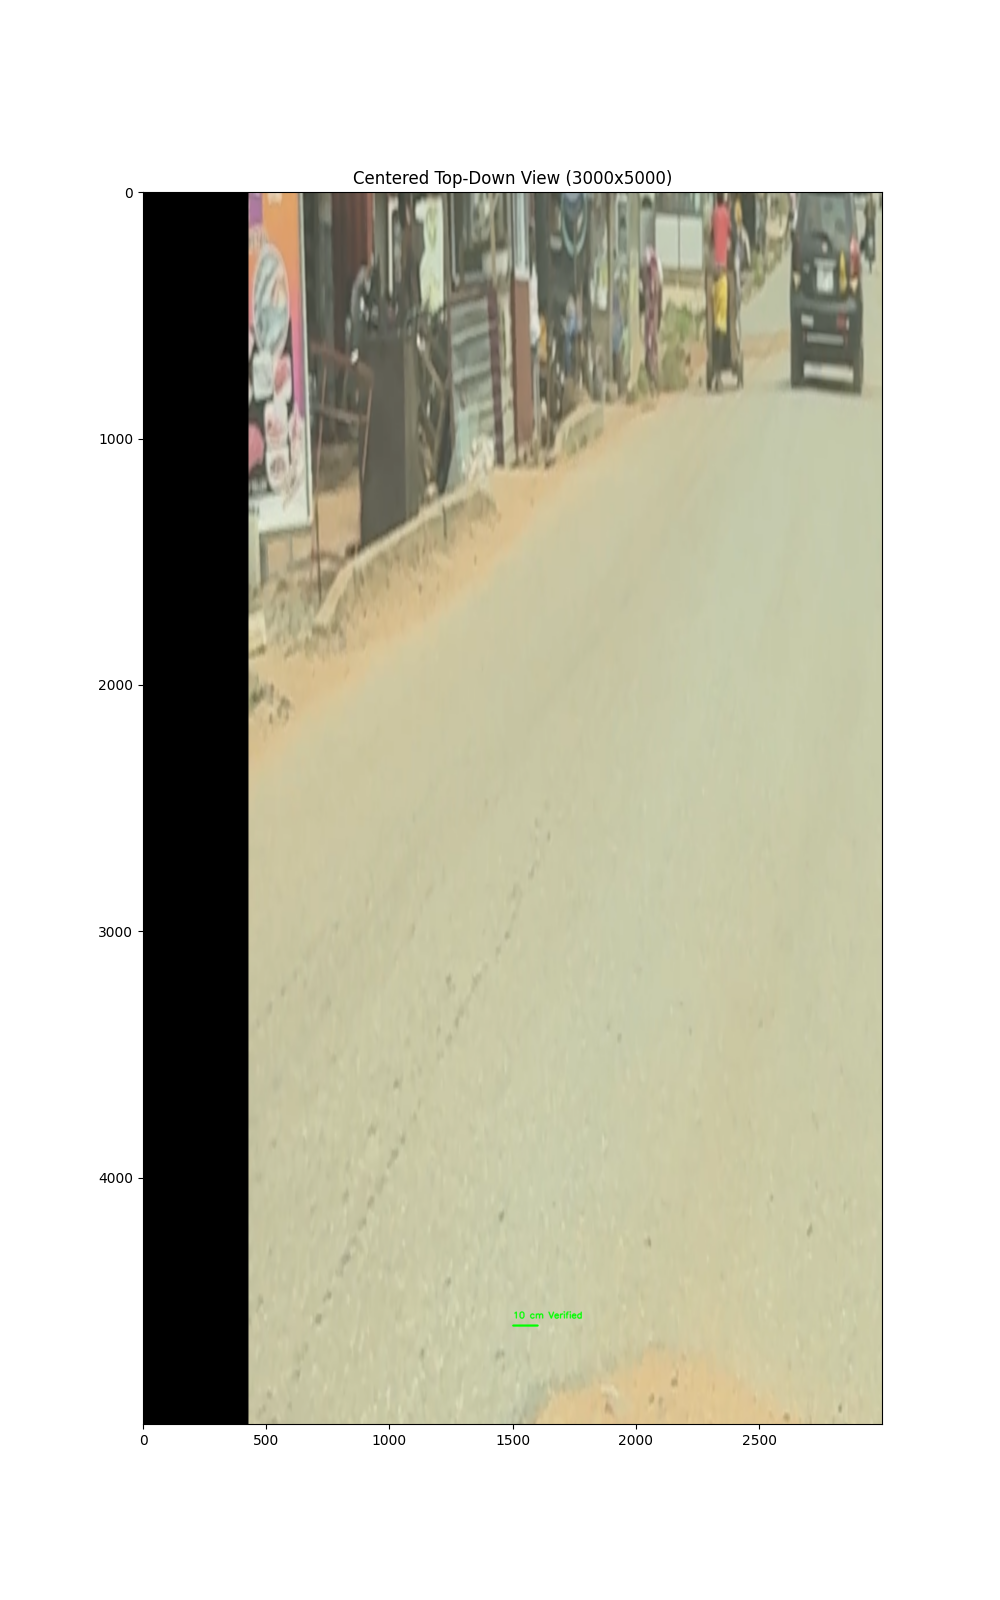

In [27]:
# --- REVISED CELL 5: SMART CENTERING ---

# 1. New Canvas Size (Tuned for your 1287 x 2298 input)
# We reduce the width slightly since we don't need 4000px of black space.
CANVAS_W = 3000
CANVAS_H = 5000

# 2. Smart Shift Calculation
# Instead of guessing 2000, we calculate the exact center.
# We want the pothole to be in the middle of the width (CANVAS_W / 2)
# and near the bottom of the height (CANVAS_H - 500) so we see the road ahead.
SHIFT_X = int(CANVAS_W / 2) 
SHIFT_Y = int(CANVAS_H - 400) # 400px padding from bottom

# 3. Create the Matrix
M_final = M.copy()
M_final[0, 2] += SHIFT_X
M_final[1, 2] += SHIFT_Y

# 4. Warp the Image
# Note: Ensure 'raw_frame' is loaded (from Cell 3)
top_down_view = cv2.warpPerspective(raw_frame, M_final, (CANVAS_W, CANVAS_H))

# 5. Verification Line (Green)
# Drawn at the new Pothole location (SHIFT_X, SHIFT_Y)
cv2.line(top_down_view, (SHIFT_X, SHIFT_Y), (SHIFT_X + 100, SHIFT_Y), (0, 255, 0), 8)
cv2.putText(top_down_view, "10 cm Verified", (SHIFT_X, SHIFT_Y - 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)

# 6. Display
plt.figure(figsize=(10, 16)) # Taller display for your vertical video
plt.imshow(cv2.cvtColor(top_down_view, cv2.COLOR_BGR2RGB))
plt.title(f"Centered Top-Down View ({CANVAS_W}x{CANVAS_H})")
plt.axis('on')
plt.show()

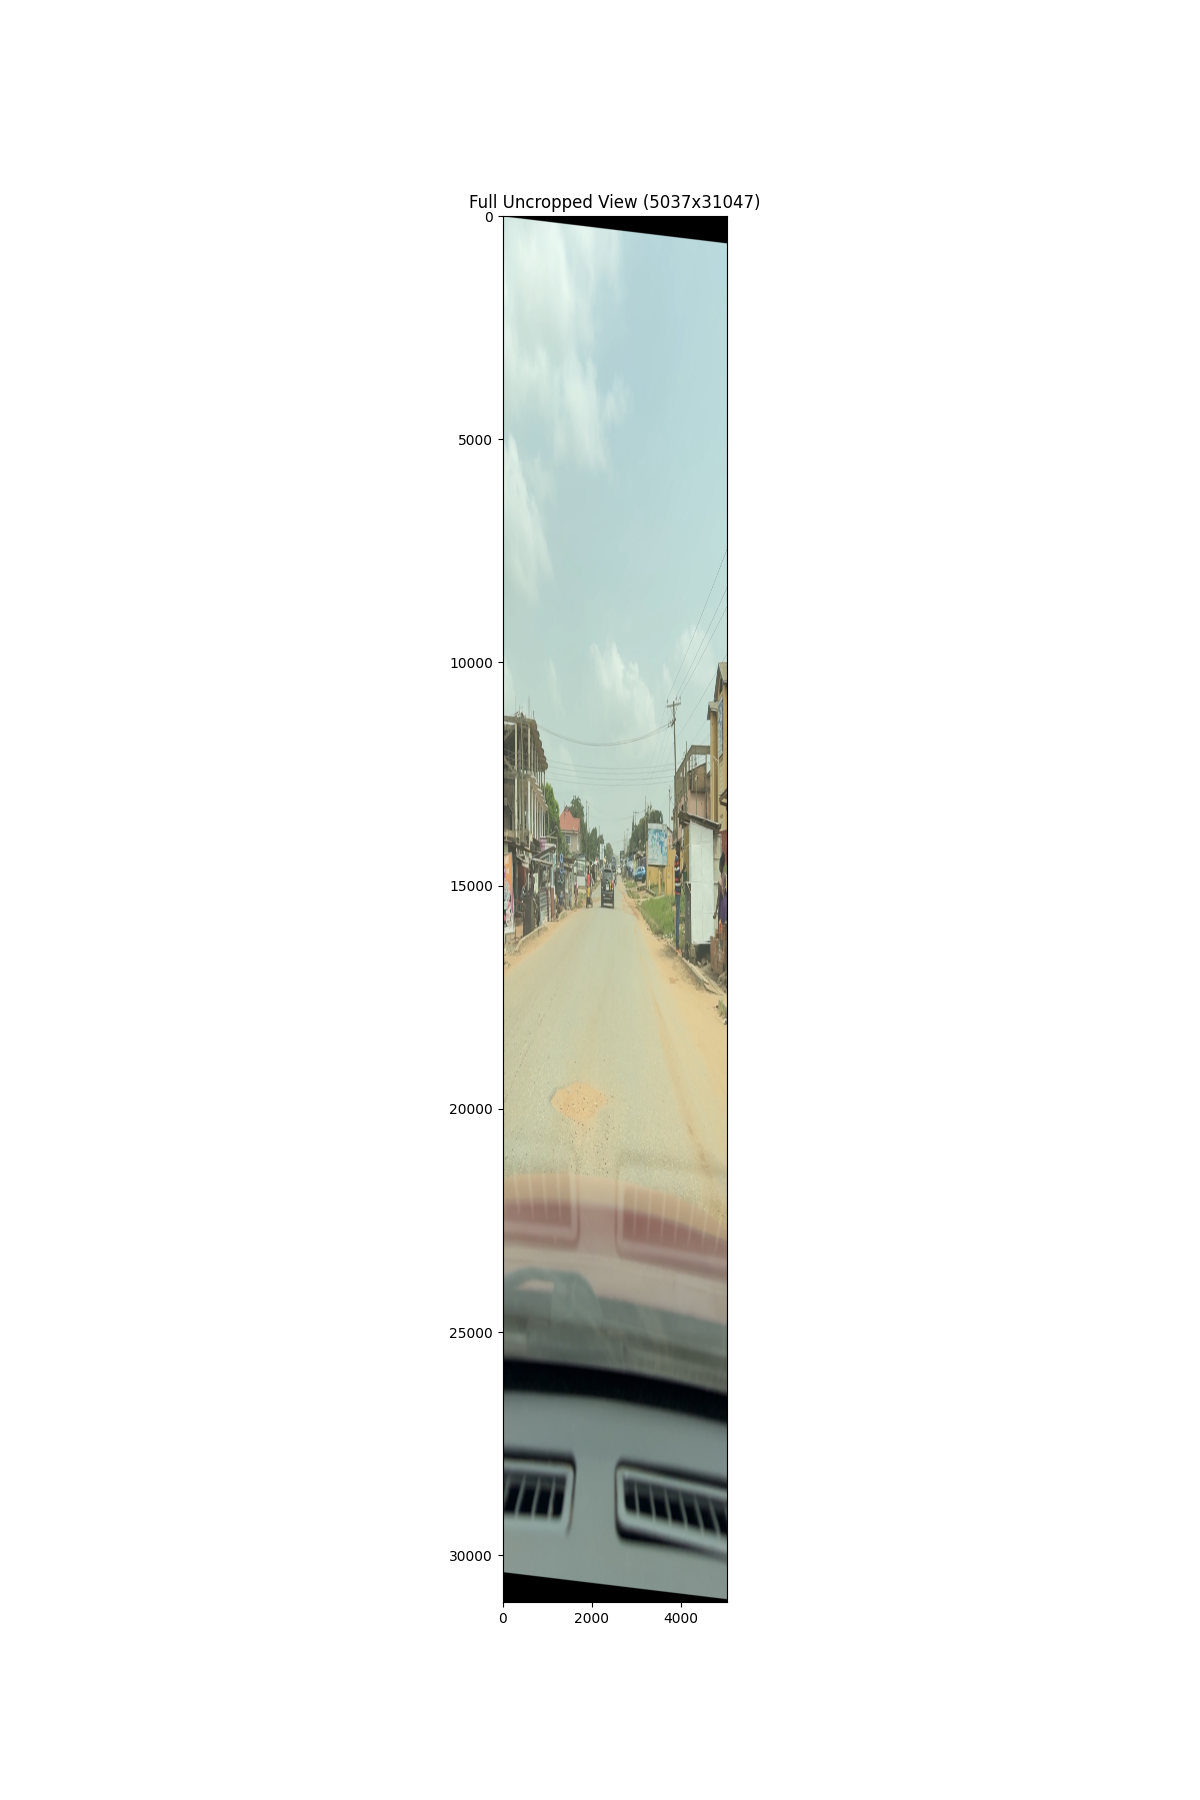

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def warp_perspective_no_crop(image, M):
    """
    Warps an image without cropping any pixels.
    Automatically calculates the new canvas size and translation.
    """
    h, w = image.shape[:2]
    
    # 1. Get the 4 corners of the ORIGINAL image
    corners_src = np.float32([[0, 0], [w, 0], [w, h], [0, h]]).reshape(-1, 1, 2)
    
    # 2. Project these corners into the new "Top-Down" world
    # This tells us where the image WANTS to go
    corners_dst = cv2.perspectiveTransform(corners_src, M)
    
    # 3. Find the Bounding Box of these new coordinates
    # (min_x, min_y) is usually negative. We need to shift by this amount.
    [xmin, ymin] = corners_dst.min(axis=0).ravel() - 0.5
    [xmax, ymax] = corners_dst.max(axis=0).ravel() + 0.5
    
    # 4. Calculate the necessary Translation (Shift)
    # If the image starts at x=-500, we must shift everything by +500
    translation_dist = [-xmin, -ymin]
    
    H_translation = np.array([
        [1, 0, translation_dist[0]],
        [0, 1, translation_dist[1]],
        [0, 0, 1]
    ])
    
    # 5. Combine the original matrix with the translation
    M_final = H_translation.dot(M)
    
    # 6. Calculate the final Canvas Size
    final_w = int(round(xmax - xmin))
    final_h = int(round(ymax - ymin))
    
    # 7. Warp
    # 'warpPerspective' now uses the shifted matrix and the full bounding box size
    return cv2.warpPerspective(image, M_final, (final_w, final_h)), M_final

# --- EXECUTE ---

# Use the 'M' you calculated in Cell 4 (based on the pothole points)
full_view_image, M_smart = warp_perspective_no_crop(raw_frame, M)

# Verify Scale (Draw line at the NEW Pothole location)
# We need to find where the pothole moved to.
# Original Pothole was at (0,0) in the UN-shifted world.
# In the NEW world, it is at (0 + shift_x, 0 + shift_y).
shift_x = M_smart[0, 2]
shift_y = M_smart[1, 2]

cv2.line(full_view_image, (int(shift_x), int(shift_y)), (int(shift_x + 100), int(shift_y)), (0, 255, 0), 10)
cv2.putText(full_view_image, "10 cm Verified", (int(shift_x), int(shift_y) - 20), 
            cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), 5)

# Show Result
plt.figure(figsize=(12, 18))
plt.imshow(cv2.cvtColor(full_view_image, cv2.COLOR_BGR2RGB))
plt.title(f"Full Uncropped View ({full_view_image.shape[1]}x{full_view_image.shape[0]})")
plt.axis('on')
plt.show()